In [ ]:
#Milestone 1-Dataset Collection
!pip install yfinance
import yfinance as yf
# Request historical data for past 10 years
data = yf.Ticker("TSLA").history(period='10y')
# Show info
print(data.info())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2012-10-31 00:00:00-04:00 to 2022-10-28 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2517 non-null   float64
 1   High          2517 non-null   float64
 2   Low           2517 non-null   float64
 3   Close         2517 non-null   float64
 4   Volume        2517 non-null   int64  
 5   Dividends     2517 non-null   int64  
 6   Stock Splits  2517 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 221.9 KB
None


In [ ]:
#Milestone 2- Data Preprocessing and Training
from google.colab import files
import pandas as pd

In [ ]:
#Load the dataframe
df= pd.read_csv (r'/content/TSLA Stock data 10yr.csv') 

In [ ]:
#returns first n rows for the object based on position in dataframe
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-10-31,1.846667,1.890000,1.824667,1.875333,1.875333,11628000
1,2012-11-01,1.883333,1.966000,1.880000,1.950000,1.950000,15361500
2,2012-11-02,1.951333,1.970000,1.903333,1.928000,1.928000,15454500
3,2012-11-05,1.986667,2.105333,1.955333,2.100000,2.100000,30733500
4,2012-11-06,2.040667,2.080000,1.996667,2.076667,2.076667,34860000


In [ ]:
#Get last n rows
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2510,2022-10-20,208.279999,215.550003,202.000000,207.279999,207.279999,117798100
2511,2022-10-21,206.419998,214.660004,203.800003,214.440002,214.440002,75529300
2512,2022-10-24,205.820007,213.500000,198.589996,211.250000,211.250000,100446800
2513,2022-10-25,210.100006,224.350006,210.000000,222.419998,222.419998,96507900
2514,2022-10-26,219.399994,230.600006,218.199997,224.639999,224.639999,85012500


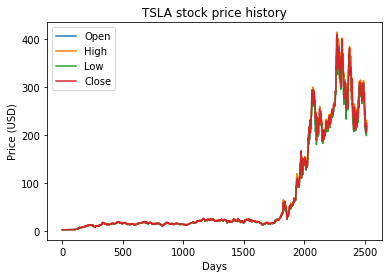

In [ ]:
#Plot data to check history
from matplotlib import pyplot as plt
plt.figure()
plt.plot(df['Open'])
plt.plot(df["High"])
plt.plot(df["Low"])
plt.plot(df["Close"])
plt.title('TSLA stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

In [ ]:
#create a new row index as a range of numbers starting at 0
df1=df.reset_index()['Close']

In [ ]:
df1

0         1.875333
1         1.950000
2         1.928000
3         2.100000
4         2.076667
           ...    
2510    207.279999
2511    214.440002
2512    211.250000
2513    222.419998
2514    224.639999
Name: Close, Length: 2515, dtype: float64

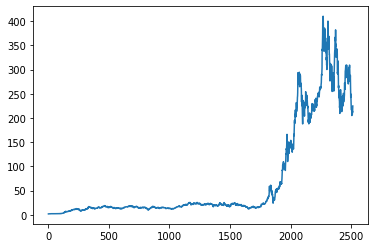

In [ ]:
#%pip install matplotlib
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#Rescale variable into range [0,1] to normalize inout feature  
scaler=MinMaxScaler(feature_range=(0,1))
#Change the time series into numpy array and reshape it
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.00000000e+00],
       [1.82964900e-04],
       [1.29055840e-04],
       ...,
       [5.13054160e-01],
       [5.40425255e-01],
       [5.45865172e-01]])

In [ ]:
#or goal is to create a model that will look into yesterday’s and today’s values to predict today’s closing price.
#Define Dataset Split into train and test set
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(1634, 881)

In [ ]:
train_data

array([[0.        ],
       [0.00018296],
       [0.00012906],
       ...,
       [0.03381732],
       [0.03485139],
       [0.03439725]])

In [ ]:
test_data

array([[0.03363272],
       [0.03528103],
       [0.03706657],
       [0.03711721],
       [0.03576458],
       [0.03540192],
       [0.03493471],
       [0.03453284],
       [0.03248919],
       [0.03335501],
       [0.0332962 ],
       [0.03270483],
       [0.02987869],
       [0.02895243],
       [0.02890669],
       [0.02688919],
       [0.02734006],
       [0.02654613],
       [0.02623084],
       [0.02642034],
       [0.02615243],
       [0.02565255],
       [0.02464134],
       [0.02703131],
       [0.02751976],
       [0.02904882],
       [0.02881194],
       [0.03018091],
       [0.03087029],
       [0.02958954],
       [0.03034917],
       [0.03051416],
       [0.03216574],
       [0.03211837],
       [0.03239444],
       [0.03128196],
       [0.03164789],
       [0.03193867],
       [0.03130483],
       [0.03122478],
       [0.03180798],
       [0.03190926],
       [0.03251533],
       [0.03208733],
       [0.03377811],
       [0.03348406],
       [0.03303319],
       [0.032

In [ ]:
import numpy
# convert an array of values into a dataset matrix
#Window of size 'n_steps' starting from first sample of data and ending at n_step'th sample from the end
#for each time step, LSTM will take n_steps-1 samples for training and predict the last sample
def create_dataset(dataset, n_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-n_step-1):
		a = dataset[i:(i+n_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + n_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
#Define window size n_step for train and test data
# reshape into X=t,t+1,t+2..t+99 and Y=t+100
n_step = 100
X_train, y_train = create_dataset(train_data, n_step)
X_test, ytest = create_dataset(test_data, n_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1533, 100)
(1533,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(780, 100)
(780,)


(None, None)

In [ ]:
# reshape input to be into LSTM format [samples, time steps, features]
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [ ]:
#Milestone 3: Create the LSTM model
import tensorflow as tf
tf.__version__
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=20,batch_size=64,verbose=1)

Epoch 1/20
24/24 [==============================] - 8s 167ms/step - loss: 1.9667e-04 - val_loss: 0.1566
Epoch 2/20
24/24 [==============================] - 3s 118ms/step - loss: 5.9126e-05 - val_loss: 0.0463
Epoch 3/20
24/24 [==============================] - 3s 119ms/step - loss: 1.5010e-05 - val_loss: 0.0198
Epoch 4/20
24/24 [==============================] - 3s 121ms/step - loss: 1.1035e-05 - val_loss: 0.0126
Epoch 5/20
24/24 [==============================] - 3s 120ms/step - loss: 1.0856e-05 - val_loss: 0.0139
Epoch 6/20
24/24 [==============================] - 3s 119ms/step - loss: 1.0726e-05 - val_loss: 0.0130
Epoch 7/20
24/24 [==============================] - 3s 121ms/step - loss: 9.8469e-06 - val_loss: 0.0123
Epoch 8/20
20/24 [========================>.....] - ETA: 0s - loss: 1.0762e-05